In [2]:
import pandas as pd
import sys
sys.path.append('../')
import seaborn as sns
from refuelplot import *
setup()
sns.set_style("darkgrid")

from paths_usa import *

In [77]:
turb = pd.read_csv(usa_path + '/turbine_data.csv',parse_dates=True)

In [82]:
cap_uswtdb = turb.groupby('time').capacity.sum().cumsum()
cap_uswtdb.index = cap_uswtdb.index.astype('datetime64[ns]')

In [106]:
USWTDB = pd.read_csv(usa_path + '/uswtdb_v2_3_20200109.csv').groupby('p_year').t_cap.sum().cumsum()
USWTDB.index = pd.to_datetime(USWTDB.index.astype('int').astype('str') + '-06')

In [53]:
cap_irena = pd.read_csv(usa_path + '/IRENA_caps.csv').transpose().reset_index().drop([0,1,2])
cap_irena.columns = ['year','cap']
cap_irena.index = pd.to_datetime(cap_irena.year + '-06')
cap_irena = cap_irena.cap.str.replace(' ','').astype('int')

Text(0.5, 0, 'time')

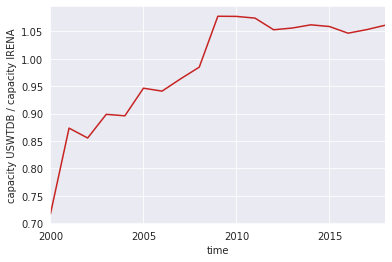

In [96]:
((cap_uswtdb['2000':'2018']/10**3)/cap_irena).plot()
plt.ylabel('capacity USWTDB / capacity IRENA')
plt.xlabel('time')

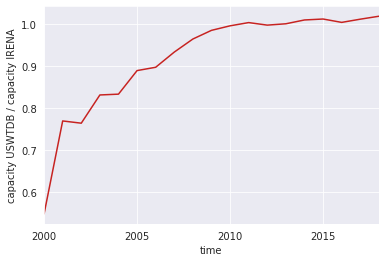

In [109]:
((USWTDB['2000':'2018']/10**3)/cap_irena).plot()
plt.ylabel('capacity USWTDB / capacity IRENA')
plt.xlabel('time')
plt.savefig(results_path+ '/USWTDBvsIRENA.png')

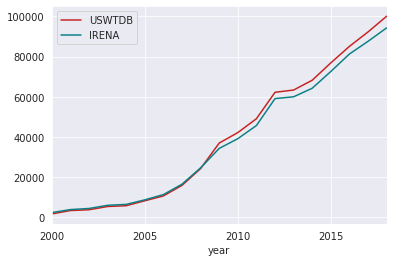

In [91]:
(cap_uswtdb['2000':'2018']/10**3).plot(label='USWTDB')
cap_irena.plot(label='IRENA')
plt.legend()

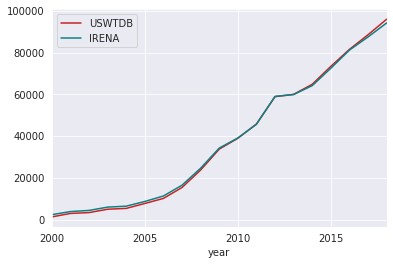

In [108]:
(USWTDB['2000':'2018']/10**3).plot(label='USWTDB')
cap_irena.plot(label='IRENA')
plt.legend()